# Classification Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**Team-14**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.
 
### Climate Change Belief Analysis 2022

Many companies are built around lessening one’s environmental impact or carbon footprint. They offer products and services that are environmentally friendly and sustainable, in line with their values and ideals. They would like to determine how people perceive climate change and whether or not they believe it is a real threat. This would add to their market research efforts in gauging how their product/service may be received.

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of classifying whether or not a person believes in climate change;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.


<a id="cont"></a>

## Table of Contents
<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

- <a href=#two>3.1 Numerical and categorical features</a>

- <a href=#four>3.2 Null Values </a>

- <a href=#four>3.3 Descriptive analysis </a>

- <a href=#four>3.4 The target variable </a>

- <a href=#four>3.5 Feature variables </a>


<a href=#four>4. Data Engineering</a>

- <a href=#four>4.1 removing the web-urls</a>

- <a href=#four>4.2 Lowercase conversion </a>

- <a href=#four>4.3 Removing punctuation and special characters </a>

- <a href=#four>4.4 Lemmatization </a>

- <a href=#four>4.5 Removing Stop words </a>

- <a href=#four>4.6 Feature Extraction using CountVectorizer </a>

- <a href=#four>4.7 Preparing the test dataset </a>


<a href=#five>5. Modeling</a>


- <a href=#four>5.1 Logistic regression classification </a>

- <a href=#four>5.2 Decision Tree </a>

- <a href=#four>5.3 Random Forests</a>

- <a href=#four>5.4 Naive Bayes</a>

- <a href=#four>5.5 k nearest neighbuors </a>

- <a href=#four> </a>

- <a href=#four> </a>


<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

## Comet

pip install comet_ml

# import comet_ml at the top of your file
from comet_ml import Experiment

# Create an experiment with your api key
experiment = Experiment(
    api_key="j6t6QCKPHzxLlzGL6upDixMVs",
    project_name="team-14-classification-sprint",
    workspace="sixolilej",
)

<a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

In this section the necessary libraries that will be used throughout the anaylisis are imported.

---

In [2]:
# Libraries for data loading, data manipulation and data visulisation

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
import string
import neattext.functions as nt
import neattext.functions as nt

import nltk
from nltk.corpus import stopwords
from nltk import SnowballStemmer, PorterStemmer, LancasterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.util import ngrams

# Libraries for data preparation and model building
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score


# set plot style
sns.set()


#import *

# Setting global constants to ensure notebook results are reproducible
#PARAMETER_CONSTANT = ###

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


In this section the data is loaded from the `df_train` file.

---

In [3]:
pd.set_option('display.max_colwidth', None)
df_train = pd.read_csv('train.csv') # load the data
#df_test = pd.read_csv('test.csv') # load the data

In [4]:
# View dataset
df_train.head()

,sentiment,message,tweetid
0,1,"PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? https://t.co/yeLvcEFXkC via @mashable",625221
1,1,It's not like we lack evidence of anthropogenic global warming,126103
2,2,RT @RawStory: Researchers say we have three years to act on climate change before it’s too late https://t.co/WdT0KdUr2f https://t.co/Z0ANPT…,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year in the war on climate change https://t.co/44wOTxTLcD,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, sexist, climate change denying bigot is leading in the polls. #ElectionNight",466954


<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


    
In this section,  an in-depth analysis of all the variables in the DataFrame is perfomed.

looking at:

-  Numerical and categorical features
-  Null values
-  Descriptive analysis 
-  The target variable 'sentiment'
-  Feature variables 'message'

###  3.1 Numerical and categorical features

Looking  at the method df.info(). This will provide the information about the data types of the variables, the number of variables and the non-null count for each variable.

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


Sentiment and tweetid columns contains numerical data, while clean_message contain Categorical data

###  3.2 Null Values

 Looking at the function df.isnull().sum(). This will give us information about which variables have null values.

In [6]:
df_train.isnull().sum()

sentiment    0
message      0
tweetid      0
dtype: int64

There are no null values present in all columns.

###  3.3 Descriptive analysis

To run summary statistics on columns containing `Numerical data`, we use `.describe()` function

In [7]:
df_train.describe()

,sentiment,tweetid
count,15819.000000,15819.000000
mean,0.917504,501719.433656
std,0.836537,289045.983132
min,-1.000000,6.000000
25%,1.000000,253207.500000
50%,1.000000,502291.000000
75%,1.000000,753769.000000
max,2.000000,999888.000000


Summary statistics on `Categorical` column

In [8]:
df_train.describe(include='object')

,message
count,15819
unique,14229
top,RT @StephenSchlegel: she's thinking about how she's going to die because your husband doesn't believe in climate change https://t.co/SjoFoNÃ¢â‚¬Â¦
freq,307


We notice that there are duplicates in message column, as shown by the unique row. These could be messages retweeted by different people.   

Possible solution would be to drop the duplicate columns. 

###  3.4 The target variable 'sentiment'

##### Class Description (Sentiments)

- 2 : News: the tweet links to factual news about climate change
- 1 : Pro: the tweet supports the belief of man-made climate change
- 0 : Neutral: the tweet neither supports nor refutes the belief of man-made climate change
- -1: Anti: the tweet does not believe in man-made climate change

In [9]:
# list of unique types of Sentiments
type_sentis = list(sorted(df_train.sentiment.unique()))
print(type_sentis)

[-1, 0, 1, 2]


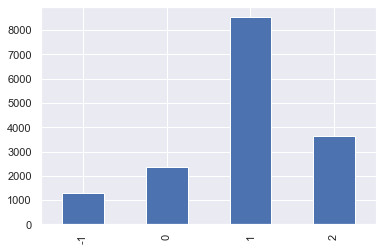

In [10]:
df_train['sentiment'].value_counts().sort_index().plot(kind = 'bar')
plt.show()

We can observe an imbalance with the class samples.

###  3.5 Feature variables 'message'

#### Words cloud of frequently twitted words

We will create a word could image of the frequently twitted word in each of the different classes which are as follows:

* 2 News: the tweet links to factual news about climate change
* 1 Pro: the tweet supports the belief of man-made climate change
* 0 Neutral: the tweet neither supports nor refutes the belief of man-made climate change
* -1 Anti: the tweet does not believe in man-made climate change

In [11]:
df_gm = df_train.copy()

In [12]:
#create different dataframes for each of the classes
df_news= df_gm.drop(df_gm[df_gm.sentiment <= 1].index)

df_pro= df_gm.drop(df_gm[df_gm.sentiment<=0].index)
df_pro= df_gm.drop(df_gm[df_gm.sentiment>=2].index)

df_neutral= df_gm.drop(df_gm[df_gm.sentiment<=(-1)].index)
df_neutral= df_gm.drop(df_gm[df_gm.sentiment>=1].index)

df_anti= df_gm.drop(df_gm[df_gm.sentiment>=0].index)

Text(0.5, 1.0, 'Anti Tweets')

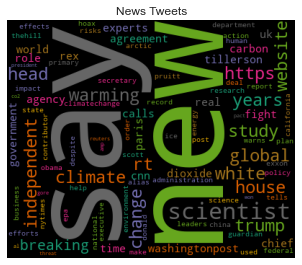

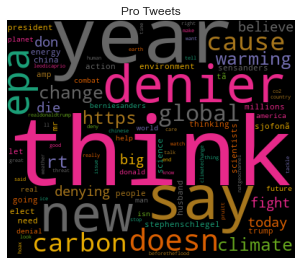

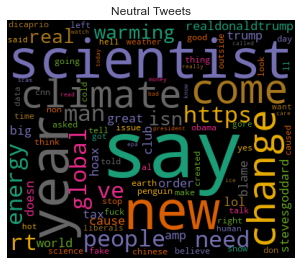

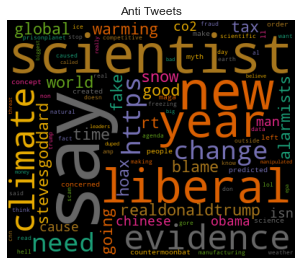

In [13]:
# Importing wordcloud for plotting word clouds and textwrap for wrapping longer text
from wordcloud import WordCloud
from textwrap import wrap

#create instance of WordCloud
wc=WordCloud(width=400, height=330, max_words=150,colormap="Dark2")

#Create string of 100 words
wcVect = CountVectorizer(stop_words='english',max_features=100) 
wcVect.fit(df_news['message'])
text1=list(wcVect.vocabulary_)
text2=string = ' '.join(text1)

text2
#createWordCloud
a=wc.generate(string)

plt.figure(figsize = (4, 8), facecolor = None)
plt.imshow(a)
plt.axis("off")
plt.tight_layout(pad = 0);

plt.title("News Tweets")
##########################################################
#create instance of WordCloud
wc=WordCloud(width=400, height=330, max_words=150,colormap="Dark2")

#Create string of 100 words
wcVect = CountVectorizer(stop_words='english',max_features=100) 
wcVect.fit(df_pro['message'])
text1=list(wcVect.vocabulary_)
text2=string = ' '.join(text1)

text2

#createWordCloud
b=wc.generate(string)


plt.figure(figsize = (4, 8), facecolor = None)
plt.imshow(b)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.title("Pro Tweets")
##################################################################
#create instance of WordCloud
wc=WordCloud(width=400, height=330, max_words=150,colormap="Dark2")

#Create string of 100 words
wcVect = CountVectorizer(stop_words='english',max_features=100) 
wcVect.fit(df_neutral['message'])
text1=list(wcVect.vocabulary_)
text2=string = ' '.join(text1)

text2

#createWordCloud
c=wc.generate(string)


plt.figure(figsize = (4, 8), facecolor = None)
plt.imshow(c)
plt.axis("off")
plt.tight_layout(pad = 0);

plt.title("Neutral Tweets")

#########################################################
#create instance of WordCloud
wc=WordCloud(width=400, height=330, max_words=150,colormap="Dark2")

#Create string of 100 words
wcVect = CountVectorizer(stop_words='english',max_features=100) 
wcVect.fit(df_anti['message'])
text1=list(wcVect.vocabulary_)
text2=string = ' '.join(text1)

text2

#createWordCloud
d=wc.generate(string)


plt.figure(figsize = (4, 8), facecolor = None)
plt.imshow(d)
plt.axis("off")
plt.tight_layout(pad = 0);

plt.title("Anti Tweets")


## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

Data engineering is the complex task of making raw data usable for the modeling phase. In this section we engineer the features such that they are ready for modelling


For our dataset, we will be doing the following steps:
* removing the web-urls
* making everything lower case
* removing punctuation and special characters
* removing mentions and retweets(`rt`)

### 4.1 removing the web-urls

In [14]:
pattern_url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
subs_url = r'url-web'
df_train['message'] = df_train['message'].replace(to_replace = pattern_url, value = subs_url, regex = True)

### 4.2 Lowercase conversion and spelling

pip install -U textblob

In [15]:
df_train['message'] = df_train['message'].str.lower()


In [16]:
#from textblob import TextBlob 

#def spelling(words):
 #   return ' '.join(([str(TextBlob(word).correct()) for word in words.split()]))

#df_train['message'] = df_train['message'].apply(spelling)

#df.head()

### 4.3 Removing punctuation and special characters

We create a funcion that will remove the web-urls, punctuation, and mentions along with retweets(`rt`)

In [17]:
def data_cleaning(tweet):
    tweet = re.sub(r'@[a-z0-9]+', '', tweet) # removing mentions
    tweet = re.sub(r'#', '', tweet) # remove #
    tweet = re.sub(r'rt[\s]+', '', tweet) # remove retweets(`rt`)
    #tweet = re.sub(r'url-web', '', tweet) # remove web-urls
    
    return tweet

In [18]:
df_train['clean_message'] = df_train['message'].apply(data_cleaning)

In [19]:
df_train.head(2)

,sentiment,message,tweetid,clean_message
0,1,"polyscimajor epa chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? url-web via @mashable",625221,"polyscimajor epa chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? url-web via"
1,1,it's not like we lack evidence of anthropogenic global warming,126103,it's not like we lack evidence of anthropogenic global warming


In case of special characters and extra whitespace, we employed NeatText 

In [20]:
# Remove special characters using NeatText
df_train['clean_message'] = df_train['clean_message'].apply(nt.remove_special_characters)

In [21]:
# Remove multiple whitespace between words
df_train['clean_message'] = df_train['clean_message'].apply(nt.remove_multiple_spaces)

In [22]:
df_train.head(2)

,sentiment,message,tweetid,clean_message
0,1,"polyscimajor epa chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? url-web via @mashable",625221,polyscimajor epa chief doesnt think carbon dioxide is main cause of global warming and wait what urlweb via
1,1,it's not like we lack evidence of anthropogenic global warming,126103,its not like we lack evidence of anthropogenic global warming


In [23]:
df_train[['message','clean_message']].head()

,message,clean_message
0,"polyscimajor epa chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? url-web via @mashable",polyscimajor epa chief doesnt think carbon dioxide is main cause of global warming and wait what urlweb via
1,it's not like we lack evidence of anthropogenic global warming,its not like we lack evidence of anthropogenic global warming
2,rt @rawstory: researchers say we have three years to act on climate change before it’s too late url-web url-web…,researchers say we have three years to act on climate change before its too late urlweb urlweb
3,#todayinmaker# wired : 2016 was a pivotal year in the war on climate change url-web,todayinmaker wired 2016 was a pivotal year in the war on climate change urlweb
4,"rt @soynoviodetodas: it's 2016, and a racist, sexist, climate change denying bigot is leading in the polls. #electionnight",its 2016 and a racist sexist climate change denying bigot is leading in the polls electionnight


In [24]:
df_train = df_train.drop('message', axis=1)

In [25]:
df_train.head(2)

,sentiment,tweetid,clean_message
0,1,625221,polyscimajor epa chief doesnt think carbon dioxide is main cause of global warming and wait what urlweb via
1,1,126103,its not like we lack evidence of anthropogenic global warming


 ### 4.4 Lemmatization

Lemmatization will help in achieving the root forms (synonyms) of the words.

In [26]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

def lemma(words, lemmatizer):
    return ' '.join(([lemmatizer.lemmatize(word) for word in words.split()]))

df_train['clean_message'] = df_train['clean_message'].apply(lemma, args=(lemmatizer, ))

df_train.head(2)


,sentiment,tweetid,clean_message
0,1,625221,polyscimajor epa chief doesnt think carbon dioxide is main cause of global warming and wait what urlweb via
1,1,126103,it not like we lack evidence of anthropogenic global warming


### 4.5 Removing Stop words

In [27]:
#remove stop words
from nltk.corpus import stopwords
stop = stopwords.words('english')

df_train['clean_message']= df_train['clean_message'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

df_train.head()

,sentiment,tweetid,clean_message
0,1,625221,polyscimajor epa chief doesnt think carbon dioxide main cause global warming wait urlweb via
1,1,126103,like lack evidence anthropogenic global warming
2,2,698562,researcher say three year act climate change late urlweb urlweb
3,1,573736,todayinmaker wired 2016 wa pivotal year war climate change urlweb
4,1,466954,2016 racist sexist climate change denying bigot leading poll electionnight


from textblob import TextBlob 


#from textblob import TextBlob 

#TextBlob(df_train['clean_message'].iloc[15]).correct()
#def spelling(df,words):
    #for i in range(words):
    #d = TextBlob(str(words)).correct()
    #for word in words:
    #print(type(words))
df_train = df_train['clean_message'].apply(lambda txt: ''.join(textblob.TextBlob(txt).correct()))

    #return ' '.join([TextBlob(word).correct() for word in words.split()])

#df_train['clean_message'] = df_train['clean_message'].apply(spelling)

#df_train.head()

### 4.6 Feature Extraction using CountVectorizer

In [28]:
df_test = pd.read_csv('test.csv')
#df_test.info()

In [29]:
#removing the web-urls
pattern_url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
subs_url = r'url-web'
df_test['message'] = df_test['message'].replace(to_replace = pattern_url, value = subs_url, regex = True)

# Lowercase conversion
df_test['message'] = df_test['message'].str.lower()

#Removing punctuation and special characters
def data_cleaning(tweet):
    tweet = re.sub(r'@[a-z0-9]+', '', tweet) # removing mentions
    tweet = re.sub(r'#', '', tweet) # remove #
    tweet = re.sub(r'rt[\s]+', '', tweet) # remove retweets(`rt`)
    #tweet = re.sub(r'url-web', '', tweet) # remove web-urls
    
    return tweet

df_test['clean_message'] = df_test['message'].apply(data_cleaning)

# Remove special characters using NeatText
df_test['clean_message'] = df_test['clean_message'].apply(nt.remove_special_characters)


 ### 4.4 Lemmatization
lemmatizer = WordNetLemmatizer()

def lemma(words, lemmatizer):
    return ' '.join(([lemmatizer.lemmatize(word) for word in words.split()]))

df_test['clean_message'] = df_test['clean_message'].apply(lemma, args=(lemmatizer, ))

#remove stop words
from nltk.corpus import stopwords
stop = stopwords.words('english')

df_test['clean_message']= df_test['clean_message'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

df_test.head()



,message,tweetid,clean_message
0,europe will now be looking to china to make sure that it is not alone in fighting climate change… url-web,169760,europe looking china make sure alone fighting climate change urlweb
1,combine this with the polling of staffers re climate change and womens' rights and you have a fascist state. url-web,35326,combine polling staffer climate change woman right fascist state urlweb
2,"the scary, unimpeachable evidence that climate change is already here: url-web #itstimetochange #climatechange @zeroco2_;..",224985,scary unimpeachable evidence climate change already urlweb itstimetochange climatechange
3,@karoli @morgfair @osborneink @dailykos \nputin got to you too jill ! \ntrump doesn't believe in climate change at all \nthinks it's s hoax,476263,putin got jill trump doesnt believe climate change think hoax
4,rt @fakewillmoore: 'female orgasms cause global warming!'\n-sarcastic republican,872928,female orgasm cause global warmingsarcastic republican


In [30]:
df_test = df_test.drop('message', axis=1)
df_test.head(2)

,tweetid,clean_message
0,169760,europe looking china make sure alone fighting climate change urlweb
1,35326,combine polling staffer climate change woman right fascist state urlweb


In [31]:
#Count Vectorizer

Vect_test = CountVectorizer(stop_words='english', min_df=2)

vect_fit_test=Vect_test.fit(df_test['clean_message'])

Vect_transform_test=Vect_test.transform(df_test['clean_message'])

feat_test=Vect_transform_test.toarray()

#scaling
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
feat_test = scaler.fit_transform(feat_test)

feat_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [32]:
x_feat=pd.DataFrame(feat_test, columns = Vect_test.get_feature_names_out())
x_feat.head(2)

,00018,10,100,1000,100days,100th,101,109c,10th,11,...,youve,yr,yung,zealand,zero,zika,zimbabwe,zimmer,zoe,zombie
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
#get feature names from vector
x_names=Vect_test.get_feature_names_out()

The text feature extraction module called CountVectorizer is used to convert a collection of documents (rows of text) into a matrix of token counts.

In [34]:
# create vectorizer instance
vect = CountVectorizer(stop_words='english', min_df=2)

#fit vectorizer
vect.fit(df_train['clean_message'])

CountVectorizer(min_df=2, stop_words='english')

In [35]:
# NUM of predictors
print(len(vect.vocabulary_))

6959


In [36]:
#transform features to numbers for modelling
vect_transform=vect.transform(df_train['clean_message'])

# Get shape of our predictive variables
vect_transform.shape

(15819, 6959)

In [37]:
#scaling
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
X_feat = scaler.fit_transform(vect_transform.toarray())

X_feat

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [38]:
X_feat=pd.DataFrame(X_feat, columns = vect.get_feature_names_out())

In [39]:
X_feat.head()

,10,100,1000,100000,101,105,109c,10yrs,11,110,...,zealot,zealotry,zero,zijn,zika,zimbabwe,zimmer,zinke,zoe,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
##### Match features

In [41]:
#new_X_feat=X_feat[x_names]

In [42]:
#text that is  not common in both text
no_match=['00018', '100days', '100th', '10th', '12tn', '137', '1850', '1900', '193', '1960s', '1977', '1978', '1981', '1982', '1988', '1stglobal', '2020dontbelate', '2025644700', '2080', '2140', '24m', '2a', '30000', '35m', '360video', '375b', '3rdlargest', '4000', '49', '52', '55', '630', '72', '750', '78', '7th', '810', '85', '8th', '93', '99c', 'a1', 'abbottturnbull', 'abo', 'abscbn', 'absorb', 'acceptable', 'accessible', 'accession', 'accountable', 'acidification', 'actionurlweb', 'activi', 'activit', 'adaption', 'adesina', 'admire', 'adopted', 'aerial', 'affirm', 'aga', 'agm', 'agri', 'airpocalypse', 'ak', 'akin', 'alarmed', 'alarmis', 'alex', 'alot', 'alters', 'altgov', 'alumnus', 'amaze', 'amazonians', 'amiright', 'amor', 'analogy', 'analyzes', 'analyzing', 'anatomy', 'ancestor', 'andrea', 'anniversary', 'answered', 'antigay', 'anyways', 'aok', 'appalling', 'application', 'applied', 'approving', 'argentinian', 'arguable', 'argued', 'arizona', 'armed', 'arrest', 'arrival', 'asap', 'ash', 'ashamed', 'asleep', 'assad', 'assist', 'assisted', 'astonishingly', 'astronaut', 'atashesi', 'attending', 'awardwinning', 'awe', 'awkward', 'aww', 'aye', 'backyard', 'balanced', 'banal', 'bangladeshi', 'banker', 'banking', 'bar', 'barrow', 'barry', 'bartley', 'baseless', 'baseline', 'bat', 'beard', 'beauty', 'beefban', 'belong', 'belt', 'bend', 'berg', 'besar', 'bezos', 'binding', 'biomedical', 'bitter', 'blacklistfor', 'blatantly', 'blessed', 'blizzard2017', 'blossom', 'bluehand', 'bn', 'bollock', 'bombshell', 'bothered', 'boulder', 'boutta', 'boyfriend', 'braavarela', 'branch', 'branding', 'bre', 'bread', 'breaker', 'breakneck', 'breakup', 'breathing', 'brett', 'brics', 'briefed', 'btsbbmas', 'burden', 'buries', 'bussin', 'busyme', 'cab', 'cabal', 'californian', 'cambridge', 'canberra', 'cannes', 'capable', 'capacity', 'carbondioxide', 'carbontax', 'cardsmove', 'carson', 'carteret', 'catalyst', 'cau', 'ceiling', 'censored', 'chan', 'chang', 'changealways', 'changebut', 'changeclimate', 'changeclimatechange', 'changefor', 'changeha', 'changehow', 'changehttp', 'changei', 'changeinduced', 'changeso', 'changetrump', 'chapter', 'characterized', 'charged', 'charlie', 'chatted', 'cheaper', 'checkmate', 'chick', 'chosen', 'christopher', 'chromosome', 'chuck', 'chump', 'cicerone', 'cigarette', 'citiesclimate', 'clark', 'classmate', 'classroom', 'cleverest', 'click', 'climatecentral', 'climatechangeshealth', 'climatechangeurlweb', 'climatehour', 'climber', 'clip', 'closest', 'coalmines', 'coexist', 'cognitive', 'collapsing', 'colombia', 'colorful', 'comey', 'comm', 'communication', 'comparable', 'comparing', 'compensation', 'compiling', 'complexity', 'condemned', 'condemns', 'conf', 'congo', 'congratulating', 'conservationist', 'conserving', 'constitutional', 'construct', 'consultation', 'contain', 'controversy', 'convention', 'cookstove', 'coordination', 'cop13', 'copenhagen', 'corrected', 'correctness', 'cotton', 'counting', 'couorders', 'couurlweb', 'cpcldr', 'crab', 'crafting', 'creator', 'cricket', 'criticized', 'cross', 'crude', 'crusade', 'cruzs', 'ctv', 'cutie', 'cycling', 'czar', 'dahil', 'dai', 'dampak', 'dancing', 'dangerousreason', 'darth', 'database', 'dave', 'debated', 'debbie', 'dec', 'deceitful', 'deceiving', 'decimated', 'deck', 'declare', 'decrease', 'decreasing', 'defiant', 'defining', 'definition', 'defra', 'demonic', 'denmark', 'denounced', 'dent', 'dependence', 'depiction', 'deportation', 'deposit', 'descent', 'described', 'dese', 'desecloser', 'devastated', 'device', 'devote', 'dial', 'dialogue', 'dictate', 'differently', 'dimension', 'dimmer', 'diplomatic', 'disavowing', 'disbands', 'disgraced', 'disguised', 'dismantled', 'dismantles', 'dismayed', 'dismissal', 'disorder', 'displacement', 'disputed', 'disrupt', 'dissonance', 'distraction', 'disturbing', 'dive', 'dividing', 'division', 'diy', 'dod', 'dokumenter', 'dominate', 'donating', 'donthecon', 'doomsdayclock', 'doorway', 'dope', 'douglas', 'downplays', 'draining', 'dreamer', 'drier', 'drown', 'drowns', 'drumpf', 'drying', 'dsnscience', 'dumped', 'dyk', 'ea', 'earful', 'earthhour2017', 'earthhours', 'earthsky', 'ec', 'educationa', 'elaborate', 'electoral', 'emailed', 'emitter', 'emphasized', 'enduring', 'energynews', 'enforce', 'enlightened', 'enrich', 'ensuring', 'enter', 'entered', 'entitlement', 'entourage', 'eos', 'epaa', 'erase', 'erasing', 'escalate', 'establishment', 'estimate', 'estimated', 'ethical', 'evaded', 'evolving', 'exaggerated', 'examiner', 'excellence', 'exempt', 'exo', 'expe', 'explainer', 'exploitation', 'exploration', 'exploring', 'exponential', 'express', 'extended', 'extensive', 'eyewitness', 'fabled', 'faculty', 'fairly', 'falseurlweb', 'faltering', 'fascism2', 'faulty', 'fbi', 'feb', 'fee', 'fetus', 'fiddled', 'filth', 'finna', 'finnish', 'fist', 'flatearthers', 'flatout', 'flip', 'flop', 'fm', 'fn', 'formal', 'formed', 'forth', 'fourth', 'foxnews', 'fragility', 'framing', 'frat', 'frightful', 'frio', 'frisk', 'frontrunner', 'frustrating', 'fue', 'fuelled', 'fuelling', 'fulfill', 'fundamentally', 'fundraiser', 'fur', 'furious', 'gaia', 'gained', 'gak', 'gatlinburg', 'gear', 'gee', 'geez', 'genetics', 'gesture', 'getready', 'girlfriend', 'glassyeyed', 'gmos', 'goodnight', 'gorgeous', 'govegan', 'gpusa', 'grandma', 'grandson', 'grasp', 'greatly', 'greenscam', 'grew', 'grid', 'grief', 'grist', 'grizzly', 'gross', 'groundhogday', 'guarantee', 'guessing', 'gunna', 'guru', 'haiku', 'hailstorm', 'hang', 'haphazard', 'happer', 'haram', 'harass', 'harshest', 'hater', 'haunting', 'hawaiian', 'headass', 'headed', 'heal', 'hears', 'heath', 'helpful', 'hemplemanadams', 'hhs', 'highlighting', 'hilary', 'hilton', 'hinder', 'hivaids', 'hmmm', 'hoc', 'hog', 'hometown', 'homo', 'hosted', 'hostility', 'household', 'howard', 'hu', 'hub', 'huffington', 'hugely', 'hunter', 'hunting', 'iam', 'iamaclimatechangedenier', 'ian', 'iceland', 'icing', 'idc', 'identity', 'idiocy', 'illustration', 'immaterial', 'imminent', 'imposed', 'incorrectly', 'ind', 'indepth', 'indisputable', 'indonesia', 'influenced', 'influencing', 'infographic', 'informal', 'informative', 'infrast', 'injecting', 'injury', 'inner', 'inquirer', 'inst', 'instructed', 'instrumental', 'integrate', 'intelligence', 'intend', 'intends', 'intensify', 'interfere', 'intergenerational', 'intl', 'introduced', 'introducing', 'investmenturlweb', 'inviting', 'ipa', 'irrational', 'iwantamerica', 'jack', 'jail', 'jailing', 'jampk', 'japanese', 'jfk', 'joking', 'jon', 'jordan', 'josefina', 'juans', 'kamala', 'kardashian', 'kathy', 'keepitintheground', 'kept', 'keynote', 'kicking', 'kn', 'knife', 'knight', 'knowingly', 'knowledgeable', 'ksa', 'lacking', 'lain', 'lame', 'lang', 'lasting', 'lately', 'leadi', 'league', 'learns', 'legend', 'lethal', 'levin', 'liable', 'liberalism', 'libtard', 'lifesaving', 'liking', 'lincoln', 'lise', 'listing', 'literacy', 'litigation', 'litre', 'litter', 'lmfao', 'loaded', 'locally', 'lock', 'loudly', 'lse', 'lukewarm', 'mag', 'magically', 'mak', 'malpractice', 'manhandles', 'mantle', 'mapped', 'margaret', 'marked', 'marking', 'maximum', 'mckenna', 'measured', 'medicine', 'mekong', 'melti', 'merkels', 'mersea', 'messenger', 'metal', 'mick', 'microbe', 'microbial', 'microbiologist', 'midwestern', 'migrate', 'migratory', 'milan', 'mildly', 'ministry', 'mistiu', 'mix', 'mnn', 'molecule', 'mon', 'mongering', 'monsoon', 'moraltime', 'moran', 'moreurlweb', 'moroccan', 'motif', 'msps', 'mud', 'muggles', 'mull', 'murderer', 'muslimsugh', 'mustread', 'mustsee', 'mysteriously', 'nah', 'naked', 'namjoon', 'nawaz', 'naysayer', 'naziinspired', 'nc', 'nd', 'nears', 'negara', 'nelson', 'neutrality', 'newbluehand', 'nexus', 'ngo', 'nigh', 'nih', 'nj', 'nominates', 'norm', 'notched', 'noting', 'nowclimate', 'nowreading', 'numbskulls', 'nyes', 'nyetho', 'nypost', 'object', 'occurrence', 'ofeurope', 'offset', 'oilsoaked', 'oj', 'omb', 'onpoli', 'ook', 'opwhales', 'ordinary', 'original', 'orthodoxy', 'osullivan', 'oth', 'outback', 'outnumber', 'outwitting', 'overflow', 'overleo', 'overturn', 'overwhelms', 'owning', 'pachauri', 'pais', 'panicking', 'parang', 'paranoid', 'pari', 'parigi', 'participate', 'participation', 'partly', 'paterson', 'peddle', 'penn', 'peo', 'peoplesclimate', 'perfectly', 'permanent', 'permit', 'pervasive', 'pet', 'pft', 'ph', 'phil', 'physorgcom', 'pivot', 'pix', 'pizzagate', 'plain', 'planetearth2', 'plate', 'plausible', 'playlist', 'pleading', 'pleasure', 'pledging', 'ploy', 'plummet', 'poc', 'poem', 'poisonous', 'polarized', 'politic', 'polled', 'pollster', 'pollu', 'pollutionwe', 'pompeo', 'ponzi', 'poorer', 'poorly', 'possibility', 'postcardperfect', 'postponement', 'powerbroker', 'praying', 'precision', 'prehistoric', 'prejudice', 'preparing', 'presidente', 'pressuring', 'pride', 'princeton', 'prized', 'prob', 'probing', 'progmo', 'proly', 'promoter', 'promotes', 'proponent', 'proportion', 'prospect', 'protects', 'providing', 'pruit', 'psychologist', 'puanconference', 'pullout', 'pun', 'punxsutawney', 'pwcs', 'qc', 'qt', 'queen', 'questionnaire', 'rainforest', 'ralph', 'rapper', 'ravage', 'raw', 'realise', 'realistic', 'realleo', 'reasonable', 'rebuttal', 'receive', 'recommends', 'recordsetting', 'rees', 'reesmogg', 'reflection', 'refund', 'refused', 'register', 'regret', 'regulatory', 'rejectrex', 'relative', 'relocate', 'remarkable', 'renewableenergy', 'renowned', 'repair', 'repeated', 'repercussion', 'repoby', 'repoout', 'reported', 'repoto', 'representation', 'reproductive', 'resea', 'researchersurlweb', 'reset', 'resign', 'resistant', 'resolve', 'resonance', 'responded', 'rethinking', 'returned', 'rev', 'revelation', 'revenge', 'reviving', 'revolut', 'ripping', 'ritter', 'riveting', 'rob', 'robust', 'rogers', 'rolled', 'ron', 'roof', 'royal', 'rubio', 'rug', 'ruined', 'saddening', 'sahara', 'salt', 'sami', 'sanity', 'satan', 'saveourfuture', 'sayin', 'scandinavia', 'scaremongering', 'schneiderman', 'scicomm', 'sciencedenying', 'score', 'scot', 
          'scotclimate', 'scum', 'secnewsbot', 'sensitive', 'serf', 'serial', 'setback', 'sexy', 'seychelles', 'sf', 'sfgate', 'shamelessly', 'shellfish', 'sheriff', 'shoe', 'sholist', 'shoof', 'shopping', 'shou', 'shoved', 'showcase', 'shrug', 'siberian', 'sickening', 'sigh', 'sight', 'signaling', 'singlepayer', 'siskind', 'sister', 'sk', 'skilfully', 'skyscraper', 'slack', 'slaughter', 'slavishly', 'slime', 'smacities', 'smallscale', 'snowman', 'snp', 'soar', 'socially', 'societal', 'solareclipse2017', 'songbird', 'soooo', 'spanish', 'specify', 'spectacular', 'spiritual', 'spouted', 'spray', 'sta', 'staa', 'stability', 'stanley', 'starve', 'starved', 'statalking', 'stathe', 'stating', 'stella', 'stephenhawking', 'steven', 'stevens', 'steward', 'stocking', 'stone', 'stratosphere', 'strengthen', 'strict', 'stripped', 'stripping', 'strive', 'submerged', 'submission', 'subsidize', 'subsidized', 'succeed', 'succes', 'sucker', 'suddenly', 'suggested', 'sul', 'sundance', 'sunscreen', 'suppoan', 'suppoand', 'supporeporting', 'supposedly', 'suppoto', 'surfer', 'surveyed', 'sustainableag', 'sustained', 'susteren', 'swallowed', 'swim', 'swimmer', 'sycophantism3', 'symbolic', 'symptom', 'tackled', 'tampering', 'tansat', 'tanya', 'taormina', 'targeted', 'tattoo', 'taxation', 'te', 'teamfollowback', 'teaparty', 'teaser', 'technica', 'technical', 'technique', 'temporarily', 'tennessee', 'terrific', 'theblaze', 'theme', 'thinkin', 'thirty', 'thisurlweb', 'thomas', 'thompson', 'thoughtprovoking', 'threestorey', 'thurs', 'ti', 'ticket', 'tight', 'tit', 'toast', 'tolerant', 'torres', 'toy', 'traced', 'tracking', 'traction', 'transi', 'transport', 'treasure', 'treated', 'treatise', 'trending', 'triggering', 'trophy', 'trumpcare', 'trumped', 'trumphell', 'trumpwins', 'trusting', 'trustworthy', 'tsunami', 'turbine', 'unaware', 'unborn', 'uncle', 'undergoing', 'understatement', 'undocumented', 'undp', 'unep', 'unfair', 'unicorn', 'unnatural', 'unsung', 'upcoming', 'urlwebmeet', 'urlwebthe', 'urlwebwe', 'user', 'usfa', 'uv', 'uw', 'vaderstyle', 'vape', 'variability', 'vegetation', 'veteran', 'victoria', 'vid', 'viewing', 'vineyard', 'virtual', 'virtue', 'vision', 'visualize', 'visually', 'vocal', 'volunteer', 'vowing', 'vr', 'vw', 'waddle', 'waging', 'wagner', 'walked', 'wallet', 'warmingand', 'warminghttps', 'weakened', 'websiteurlweb', 'weed', 'westpacs', 'wet', 'wether', 'wholly', 'willfully', 'william', 'witchcraft', 'withdraws', 'witnessing', 'wondered', 'wonread', 'wore', 'worldcoffeeproducersforum', 'worldoceansday', 'worldrenowned', 'wounded', 'wp', 'wwfs', 'wykonews', 'xiuhtezcatl', 'yangtze', 'yelled', 'yellow', 'zombie']

In [43]:
#drop no_match
x_feat.drop(no_match, axis = 1, inplace=True)
x_feat.head()

,10,100,1000,101,109c,11,12,125,13,14,...,youtube,youve,yr,yung,zealand,zero,zika,zimbabwe,zimmer,zoe
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
#length of final list of feature
x_names2=x_feat.columns
len(x_names2)

4298

In [45]:
#final list of features
new_X_feat=X_feat[x_names2]
new_X_feat.head()

,10,100,1000,101,109c,11,12,125,13,14,...,youtube,youve,yr,yung,zealand,zero,zika,zimbabwe,zimmer,zoe
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 4.7 Balancing the classes

In [46]:
X=new_X_feat
y=df_train['sentiment']

#Enconding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

#Mapp encoded classes to class
def get_integer_mapping(le):
    '''
    Return a dict mapping labels to their integer values
    from an SKlearn LabelEncoder
    le = a fitted SKlearn LabelEncoder
    '''
    res = {}
    for cl in le.classes_:
        res.update({cl:le.transform([cl])[0]})

    return res

integerMapping = get_integer_mapping(le)

for name in df_train['sentiment'].unique():
    print(name,integerMapping[name])

1 2
2 3
0 1
-1 0


Class=2, n=7635 (48.265%)
Class=0, n=1170 (7.396%)
Class=1, n=2129 (13.458%)
Class=3, n=3303 (20.880%)


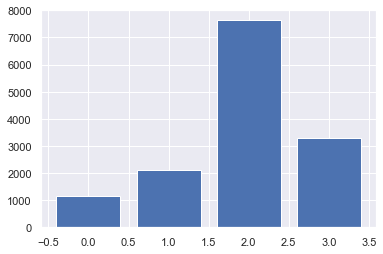

In [47]:
from collections import Counter
from sklearn.preprocessing import LabelEncoder

# split into input and output elements
X=new_X_feat
y=y

# import train/test split module
from sklearn.model_selection import train_test_split

# Get training and testing data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# summarize distribution
counter = Counter(y_train)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

Class=2, n=7635 (48.265%)
Class=0, n=7635 (48.265%)
Class=1, n=7635 (48.265%)
Class=3, n=7635 (48.265%)


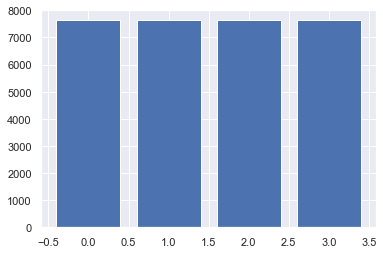

In [48]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# transform the dataset
oversample = SMOTE()

X_train, y_train = oversample.fit_resample(X_train, y_train)
# summarize distribution
counter = Counter(y_train)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

In this section, we will create one or more classification models that are able to accurately predict our classes. 

These are the models that will created:



In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import  AdaBoostClassifier
from sklearn.svm import LinearSVC

from sklearn import metrics


In [50]:
names = ['Logistic Regression',
         'Decision Tree',
         'Random Forest',
         'Gaussian NB',
         'Multinomial NB',
         'Nearest Neighbors', 
         'Linear SVM',          
         'AdaBoost']

In [51]:
classifiers = [
    LogisticRegression(multi_class='ovr', max_iter=400),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GaussianNB(),
    MultinomialNB(),
    KNeighborsClassifier(3),
    LinearSVC(),
    AdaBoostClassifier()
]

In [52]:
results = []

models = {}
confusion = {}
class_report = {}


for name, clf in zip(names, classifiers):    
    print ('Fitting {:s} model...'.format(name))
    run_time = %timeit -q -o clf.fit(X_train, y_train)
    
    print ('... predicting')
    y_pred = clf.predict(X_train)   
    y_pred_test = clf.predict(X_test)
    
    print ('... scoring')
    accuracy  = metrics.accuracy_score(y_train, y_pred)
    precision = metrics.precision_score(y_train, y_pred,average='micro')
    recall    = metrics.recall_score(y_train, y_pred,average='micro')
    
    f1        = metrics.f1_score(y_train, y_pred,average='weighted')    
    f1_test   = metrics.f1_score(y_test, y_pred_test,average='weighted')    
    
    # Save the results to dictionaries
    models[name] = clf    
    confusion[name] = metrics.confusion_matrix(y_train, y_pred)
    class_report[name] = metrics.classification_report(y_train, y_pred)
    
    results.append([name, accuracy, precision, recall, f1, f1_test, run_time.best])

    
results = pd.DataFrame(results, columns=['Classifier', 'Accuracy', 'Precision', 'Recall', 'F1 Train', 'F1 Test', 'Train Time'])
results.set_index('Classifier', inplace= True)

print ('... All done!')

Fitting Logistic Regression model...
... predicting
... scoring
Fitting Decision Tree model...
... predicting
... scoring
Fitting Random Forest model...
... predicting
... scoring
Fitting Gaussian NB model...
... predicting
... scoring
Fitting Multinomial NB model...
... predicting
... scoring
Fitting Nearest Neighbors model...
... predicting
... scoring
Fitting Linear SVM model...
... predicting
... scoring
Fitting AdaBoost model...
... predicting
... scoring
... All done!


In [53]:
results.sort_values('F1 Train', ascending=False)

,Accuracy,Precision,Recall,F1 Train,F1 Test,Train Time
Classifier,,,,,,
Decision Tree,0.997086,0.997086,0.997086,0.997087,0.634593,51.081792
Random Forest,0.997086,0.997086,0.997086,0.997086,0.692568,115.092537
Linear SVM,0.919221,0.919221,0.919221,0.919171,0.665772,5.050389
Logistic Regression,0.864931,0.864931,0.864931,0.864610,0.679605,65.654427
Nearest Neighbors,0.857859,0.857859,0.857859,0.846331,0.470956,0.212960
Multinomial NB,0.778585,0.778585,0.778585,0.775588,0.643061,0.463129
Gaussian NB,0.676752,0.676752,0.676752,0.662890,0.427593,4.364959
AdaBoost,0.594434,0.594434,0.594434,0.585372,0.491795,84.916794


<AxesSubplot:xlabel='Classifier'>

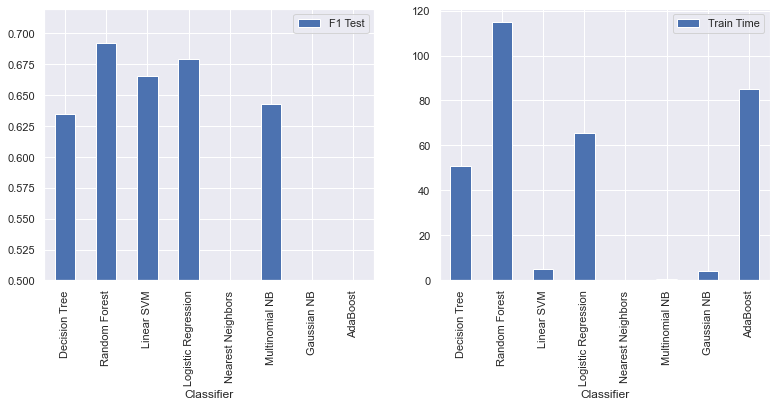

In [54]:
fig, ax = plt.subplots(1, 2, figsize=(13,5))
results.sort_values('F1 Train', ascending=False, inplace=True)
results.plot(y=['F1 Test'], kind='bar', ax=ax[0], xlim=[0,1.1], ylim=[0.50,0.72])
results.plot(y='Train Time', kind='bar', ax=ax[1])

### 5.1 Logistic regression classification

In [55]:
confusion['Random Forest']

array([[7611,   23,    0,    1],
       [   3, 7625,    4,    3],
       [   0,   20, 7597,   18],
       [   0,    2,   15, 7618]], dtype=int64)

In [56]:
print(class_report['Random Forest'])

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7635
           1       0.99      1.00      1.00      7635
           2       1.00      1.00      1.00      7635
           3       1.00      1.00      1.00      7635

    accuracy                           1.00     30540
   macro avg       1.00      1.00      1.00     30540
weighted avg       1.00      1.00      1.00     30540



## Model Validation

In [57]:
# Set number of rows n = 5000 to reduce computational time
n = 5000

In [58]:
cv = []
for name, model in models.items():
    print ()
    print(name)
    scores = cross_val_score(model, X=X_train[:n], y=y_train[:n], cv=10)
    print("Accuracy: {:0.2f} (+/- {:0.4f})".format(scores.mean(), scores.std()))
    cv.append([name, scores.mean(), scores.std() ])
    
cv = pd.DataFrame(cv, columns=['Model', 'CV_Mean', 'CV_Std_Dev'])
cv.set_index('Model', inplace=True)


Logistic Regression
Accuracy: 0.70 (+/- 0.0151)

Decision Tree
Accuracy: 0.59 (+/- 0.0189)

Random Forest
Accuracy: 0.65 (+/- 0.0199)

Gaussian NB
Accuracy: 0.52 (+/- 0.0097)

Multinomial NB
Accuracy: 0.67 (+/- 0.0082)

Nearest Neighbors
Accuracy: 0.43 (+/- 0.0297)

Linear SVM
Accuracy: 0.67 (+/- 0.0208)

AdaBoost
Accuracy: 0.61 (+/- 0.0200)


Now we will plot a bar chart to determine the best model suitable for out dataset. 

<AxesSubplot:xlabel='Model'>

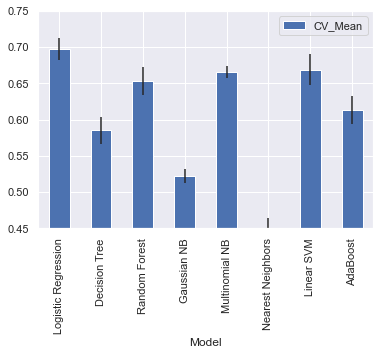

In [59]:
cv.plot(y='CV_Mean', yerr='CV_Std_Dev',kind='bar', ylim=[0.45, 0.75])

In [60]:
# import logistic regression module
from sklearn.linear_model import LogisticRegression

# create model object
lr = LogisticRegression(multi_class='ovr',max_iter=400)

# train model
lr.fit(X_train, y_train)

LogisticRegression(max_iter=400, multi_class='ovr')

In [61]:
dir(models['Random Forest'])

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_feature_names',
 '_check_n_features',
 '_compute_oob_predictions',
 '_estimator_type',
 '_get_oob_predictions',
 '_get_param_names',
 '_get_tags',
 '_make_estimator',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_required_parameters',
 '_set_oob_score_and_attributes',
 '_validate_X_predict',
 '_validate_data',
 '_validate_estimator',
 '_validate_y_class_weight',
 'apply',
 'base_estimator',
 'base_estimator_',
 'bootstrap',
 'ccp_alpha',
 'class_weight'

Hyperparameters to consider for tuning

In [62]:
models['Random Forest']._get_param_names()

['bootstrap',
 'ccp_alpha',
 'class_weight',
 'criterion',
 'max_depth',
 'max_features',
 'max_leaf_nodes',
 'max_samples',
 'min_impurity_decrease',
 'min_samples_leaf',
 'min_samples_split',
 'min_weight_fraction_leaf',
 'n_estimators',
 'n_jobs',
 'oob_score',
 'random_state',
 'verbose',
 'warm_start']

#### Checking outcomes on the testing set

In [63]:
#Generate predictions
y_pred = lr.predict(X_test)


# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

import warnings
warnings.filterwarnings('ignore')

              precision    recall  f1-score   support

           0       0.42      0.60      0.50       126
           1       0.46      0.53      0.49       224
           2       0.83      0.67      0.74       895
           3       0.63      0.81      0.71       337

    accuracy                           0.67      1582
   macro avg       0.59      0.65      0.61      1582
weighted avg       0.71      0.67      0.68      1582



#### Predictions on Test

In [64]:
preds=lr.predict(x_feat)

In [65]:
daf=pd.DataFrame(preds,columns=['sentiment'])
daf.head(2)

,sentiment
0,3
1,2


In [66]:
output=pd.DataFrame({'tweetid':df_test['tweetid']})
submission=output.join(daf)
submission.to_csv('submission4.csv',index=False)

submission

,tweetid,sentiment
0,169760,3
1,35326,2
2,224985,2
3,476263,2
4,872928,2
...,...,...
10541,895714,0
10542,875167,2
10543,78329,2
10544,867455,1


### 5.2 Decision Tree

In [67]:
from sklearn.tree import DecisionTreeClassifier

forest = DecisionTreeClassifier(random_state=42)
forest.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [68]:
pred_forest_dt = forest.predict(X_test)
pred_forest_dt=pd.DataFrame(pred_forest_dt)

# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_forest_dt))

import warnings
warnings.filterwarnings('ignore')

              precision    recall  f1-score   support

           0       0.28      0.29      0.29       126
           1       0.37      0.45      0.40       224
           2       0.75      0.72      0.73       895
           3       0.67      0.62      0.64       337

    accuracy                           0.63      1582
   macro avg       0.52      0.52      0.52      1582
weighted avg       0.64      0.63      0.63      1582



#### Logging results on comet


In [69]:
from sklearn.metrics import accuracy_score

accuracy_rf=accuracy_score(y_test, pred_forest_dt)

params = {"random_state=": 42,
      "model_type": "RandomForestClassifier",
      "scaler:": "standard scale"
         }

metrics = {"Acuracy":accuracy_rf}

In [70]:
experiment.log_parameters(params)
experiment.log_metrics(metrics)

#### Hyperparameter tuning

In [71]:
from sklearn.model_selection import GridSearchCV
params_dt = {'criterion':['gini','entropy'],'max_depth':[100,150,200,250,300,350,400,450,500]}
gs_nb = GridSearchCV(estimator=forest, 
                 param_grid=params_dt,    
                 verbose=1, 
                 scoring='f1_macro') 
gs_nb.fit(X_train, y_train)

gs_nb.best_params_

Fitting 5 folds for each of 18 candidates, totalling 90 fits


{'criterion': 'gini', 'max_depth': 450}

In [72]:
from sklearn.tree import DecisionTreeClassifier

forest = DecisionTreeClassifier(criterion="gini", max_depth=450, random_state=42)
forest.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=450, random_state=42)

In [73]:
pred_forest_dt = forest.predict(X_test)

# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_forest_dt))

import warnings
warnings.filterwarnings('ignore')

              precision    recall  f1-score   support

           0       0.31      0.32      0.31       126
           1       0.38      0.43      0.40       224
           2       0.74      0.74      0.74       895
           3       0.68      0.63      0.65       337

    accuracy                           0.64      1582
   macro avg       0.53      0.53      0.53      1582
weighted avg       0.64      0.64      0.64      1582



### 5.3 Random Forests

### 5.4 Naive Bayes

In [74]:
#import the model
from sklearn.naive_bayes import GaussianNB

# Define the model 
naive_bayes = GaussianNB()

# Fit the model 
naive_bayes.fit(X_train, y_train)

GaussianNB()

#### Hyperparameter tuning

In [75]:
from sklearn.model_selection import GridSearchCV

params_nb = {'var_smoothing': np.logspace(0,-9, num=10)}
gs_nb = GridSearchCV(estimator=naive_bayes, 
                 param_grid=params_nb,    
                 verbose=1, 
                 scoring='f1_macro') 
gs_nb.fit(X_train, y_train)

gs_nb.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


{'var_smoothing': 0.001}

In [76]:
gs_nb.best_score_

0.6636248756598367

In [77]:
# Define the model 
naive_bayes_better = GaussianNB(var_smoothing=1e-07)
# Fit the model 
naive_bayes_better.fit(X_train, y_train)

GaussianNB(var_smoothing=1e-07)

#### Checking outcomes on the testing set


In [78]:
# Generate predictions
y_pred_nb = naive_bayes.predict(X_test)

y_pred_nb=pd.DataFrame(y_pred_nb)

# Classification report
print(classification_report(y_test, y_pred_nb))

import warnings
warnings.filterwarnings('ignore')

              precision    recall  f1-score   support

           0       0.16      0.56      0.25       126
           1       0.19      0.33      0.24       224
           2       0.75      0.33      0.46       895
           3       0.51      0.56      0.54       337

    accuracy                           0.40      1582
   macro avg       0.40      0.44      0.37      1582
weighted avg       0.57      0.40      0.43      1582



#### Checking outcomes on tuned model


In [79]:
# Generate predictions
y_pred_nb_better = naive_bayes_better.predict(X_test)

y_pred_nb_better=pd.DataFrame(y_pred_nb_better)

# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_nb_better))

import warnings
warnings.filterwarnings('ignore')

              precision    recall  f1-score   support

           0       0.16      0.56      0.25       126
           1       0.20      0.33      0.25       224
           2       0.75      0.33      0.46       895
           3       0.51      0.58      0.54       337

    accuracy                           0.40      1582
   macro avg       0.40      0.45      0.38      1582
weighted avg       0.57      0.40      0.43      1582



### 5.5 k nearest neighbuors

In [80]:
from sklearn.neighbors import KNeighborsClassifier

n_neighbors = 10 

# Define the model
knn = KNeighborsClassifier(n_neighbors,  weights='distance')
# Fit the model 
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10, weights='distance')

#### Hyperparameter tuning

In [81]:
ks = [ 1, 2, 3, 4, 5, 6, 7, 8, 9, 10,20]

param_grid = {'n_neighbors': ks}

grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid, scoring='f1')

grid_knn.fit(X, y)
grid_knn.best_params_

{'n_neighbors': 1}

In [82]:
n_neighbors = 1 

#model instance
knn_improved = KNeighborsClassifier(n_neighbors,  weights='distance')
# Fit the model 
knn_improved.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1, weights='distance')

#### Checking outcomes on the testing set

In [83]:
# Generate predictions
y_pred_knn = knn.predict(X_test)

y_pred_knn=pd.DataFrame(y_pred_knn)

# Classification report
print(classification_report(y_test, y_pred_knn))

import warnings
warnings.filterwarnings('ignore')

              precision    recall  f1-score   support

           0       0.23      0.59      0.34       126
           1       0.26      0.67      0.38       224
           2       0.92      0.27      0.42       895
           3       0.56      0.71      0.62       337

    accuracy                           0.45      1582
   macro avg       0.49      0.56      0.44      1582
weighted avg       0.70      0.45      0.45      1582



#### Checking outcomes on tuned model


In [88]:
# Generate predictions
y_pred_knn_improved = knn_improved.predict(X_test)

y_pred_knn_improved=pd.DataFrame(y_pred_knn_improved)

# Classification report
print(classification_report(y_test, y_pred_knn_improved))

import warnings
warnings.filterwarnings('ignore')

              precision    recall  f1-score   support

           0       0.27      0.46      0.34       126
           1       0.33      0.58      0.42       224
           2       0.80      0.50      0.61       895
           3       0.55      0.68      0.61       337

    accuracy                           0.54      1582
   macro avg       0.49      0.55      0.50      1582
weighted avg       0.64      0.54      0.56      1582



## 5.6 Support Vector Machines

In [93]:
models['Linear SVM'].get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': True,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'loss': 'squared_hinge',
 'max_iter': 1000,
 'multi_class': 'ovr',
 'penalty': 'l2',
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

In [ ]:
from sklearn.svm import SVC

# Instantiate support vector classification model
svc = SVC(kernel='rbf')

# train model
svc.fit(X_train,y_train)

In [ ]:
#Generate predictions
y_pred_svc= svc.predict(X_test)

# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_svc))

import warnings
warnings.filterwarnings('ignore')

## 5.7 Neaural Networks 

In [ ]:
# import the libraries 
import tensorflow as tf
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [ ]:
def build_clf(unit):
  # creating the layers of the NN
    ann = tf.keras.models.Sequential()
    ann.add(tf.keras.layers.Dense(units=unit, activation='relu'))
    ann.add(tf.keras.layers.Dense(units=unit, activation='relu'))
    ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
    ann.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['sparse_categorical_accuracy'])
    return ann

In [ ]:
model=KerasClassifier(build_fn=build_clf)

In [ ]:
params={'batch_size':[100, 20, 50, 25, 32], 
        'nb_epoch':[200, 100, 300, 400, 800, 1000],
        'unit':[5,6, 10, 11, 12, 15],
           
        }
gs=GridSearchCV(estimator=model, param_grid=params, cv=10)
# now fit the dataset to the GridSearchCV object. 
gs = gs.fit(X_train, y_train)

In [ ]:
X_train.shape

In [ ]:
#import important packages
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

In [ ]:
# create model instance
model_nn = Sequential([
  Dense(500, activation='relu',input_shape=(4298,)),
  Dense(500, activation='relu'),
  Dense(250, activation='relu'),
  Dense(4, activation='softmax'),
])

model_nn.compile(loss='sparse_categorical_crossentropy', optimizer='adam', 
                 metrics=['sparse_categorical_accuracy'])

In [ ]:
# train model
history = model_nn.fit(X_train, y_train, batch_size=500, epochs=10, verbose=True, validation_split=0.20)

In [ ]:
# Evaluating the model
loss, accuracy  = model_nn.evaluate(X_test, y_test, verbose=False)

accuracy

In [ ]:
loss

In [ ]:
#Generate predictions
preds_nn=model_nn.predict(x_feat)

preds_nn=np.argmax(preds_nn, axis=1)

preds_nn.shape

In [ ]:
daf=pd.DataFrame(preds_nn,columns=['index'])

daf['sentiment'] = ['-1' if x==0 else '0' if x==1 else '1' if x==2 else "2" for x in daf['index']]

daf1=daf.drop(["index"], axis=1)

daf1.head(2)

In [ ]:
output=pd.DataFrame({'tweetid':df_test['tweetid']})
submission=output.join(daf1)
#submission.to_csv('submission_nn.csv',index=False)

submission.head(2)

In [ ]:
experiment.end()